In [4]:
import numpy as np
import pandas as pd

In [64]:
path = './datasets/HKMO_Award_List/'

In [65]:
HKMO_Award_List_2024 = pd.read_csv(path + 'HKMO_Award_List_2024.csv', delimiter='	')
HKMO_Award_List_2024_schools = HKMO_Award_List_2024['就讀學校'].value_counts()

HKMO_Award_List_2023 = pd.read_csv(path + 'HKMO_Award_List_2023.csv', delimiter='	')
HKMO_Award_List_2023_schools = HKMO_Award_List_2023['就讀學校'].value_counts()

HKMO_Award_List_2022 = pd.read_csv(path + 'HKMO_Award_List_2022.csv', delimiter='	')
HKMO_Award_List_2022_schools = HKMO_Award_List_2022['學校編號'].value_counts()

HKMO_Award_List_2021 = pd.read_csv(path + 'HKMO_Award_List_2021.csv', delimiter='	')
HKMO_Award_List_2021_schools = HKMO_Award_List_2021['學校編號'].value_counts()

In [66]:
HKMO_Award_List = pd.concat([HKMO_Award_List_2024_schools, HKMO_Award_List_2023_schools, HKMO_Award_List_2022_schools,HKMO_Award_List_2021_schools], axis=1,ignore_index=True)
HKMO_Award_List.columns = ['2024','2023','2022','2021']
HKMO_Award_List.values[HKMO_Award_List.isna()] = 0
HKMO_Award_List.reset_index(inplace=True)
HKMO_Award_List.rename(columns={'index': 'School Code'}, inplace=True)
HKMO_Award_List

,School Code,2024,2023,2022,2021
0,AP0409,27.0,6.0,1.0,6.0
1,AP0301,15.0,3.0,0.0,6.0
2,AP0118,14.0,31.0,6.0,10.0
3,AP0544,14.0,13.0,0.0,4.0
4,AP0653,13.0,9.0,4.0,8.0
...,...,...,...,...,...
535,AP0078,0.0,0.0,0.0,1.0
536,AP0595,0.0,0.0,0.0,1.0
537,AP0370,0.0,0.0,0.0,1.0
538,AP0148,0.0,0.0,0.0,1.0


In [67]:
primary_school_code_and_list = pd.read_csv('./datasets/primary_school_code_and_list.csv')
primary_school_code_and_list

,Unnamed: 0,District,Sub_District,School Code,School Name
0,0,港島,中西區,AP0159,己連拿小學
1,1,港島,中西區,AP0078,中西區聖安多尼學校
2,2,港島,中西區,AP0052,天主教總堂區學校
3,3,港島,中西區,AP0311,李陞小學
4,4,港島,中西區,AP0280,英皇書院同學會小學
...,...,...,...,...,...
576,576,新界,西貢區,AP0319,樂善堂劉德學校
577,577,新界,西貢區,AP0693,樹宏學校
578,578,新界,西貢區,AP0153,優才（楊殷有娣）書院
579,579,新界,西貢區,AP0714,思貝禮國際學校


In [68]:
primary_school_code_HKMO_Award = pd.merge(primary_school_code_and_list, HKMO_Award_List, on='School Code', how='inner')
primary_school_code_HKMO_Award

,Unnamed: 0,District,Sub_District,School Code,School Name,2024,2023,2022,2021
0,1,港島,中西區,AP0078,中西區聖安多尼學校,0.0,0.0,0.0,1.0
1,3,港島,中西區,AP0311,李陞小學,1.0,0.0,0.0,0.0
2,4,港島,中西區,AP0280,英皇書院同學會小學,2.0,0.0,0.0,0.0
3,5,港島,中西區,AP0281,英皇書院同學會小學第二校,3.0,1.0,0.0,1.0
4,7,港島,中西區,AP0026,般咸道官立小學,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
361,571,新界,西貢區,AP0175,港澳信義會小學,1.0,0.0,0.0,0.0
362,573,新界,西貢區,AP0566,順德聯誼總會梁潔華小學,3.0,0.0,0.0,1.0
363,575,新界,西貢區,AP0135,播道書院,3.0,0.0,0.0,1.0
364,578,新界,西貢區,AP0153,優才（楊殷有娣）書院,7.0,4.0,1.0,7.0


In [69]:
primary_school_code_HKMO_Award['District'].value_counts()

District
新界    181
九龍    114
港島     71
Name: count, dtype: int64

In [70]:
primary_school_code_HKMO_Award['Sub_District'].value_counts()

Sub_District
九龍城區    41
沙田區     35
元朗區     31
屯門區     27
東區      23
深水埗區    22
北區      20
觀塘區     20
中西區     17
大埔區     17
西貢區     17
油尖旺區    16
灣仔區     16
黃大仙區    15
南區      15
葵青區     14
荃灣區     13
離島區      7
Name: count, dtype: int64

In [71]:
# 计算每个区和子区的总和
primary_school_code_HKMO_Award['Total'] = primary_school_code_HKMO_Award[['2024', '2023', '2022', '2021']].sum(axis=1)
Total_HKMO_Awards_By_District = primary_school_code_HKMO_Award.groupby(['District', 'Sub_District'])['Total'].sum().reset_index()
Total_HKMO_Awards_By_District

,District,Sub_District,Total
0,九龍,九龍城區,325.0
1,九龍,油尖旺區,113.0
2,九龍,深水埗區,140.0
3,九龍,觀塘區,96.0
4,九龍,黃大仙區,51.0
5,新界,元朗區,87.0
6,新界,北區,73.0
7,新界,大埔區,52.0
8,新界,屯門區,109.0
9,新界,沙田區,137.0


In [13]:
import plotly.express as px

In [14]:
!pip install nbformat>=4.2.0

In [16]:

fig = px.sunburst(Total_HKMO_Awards_By_District, path=['District', 'Sub_District'], values='Total',
                  color='Total')
fig.show()

In [254]:
path_en = './datasets/PSP/psp_2024_en.csv'
path_sc = './datasets/PSP/psp_2024_tc.csv'

In [255]:
schools_datasets_en = pd.read_csv(path_en, delimiter=',')
schools_datasets_sc = pd.read_csv(path_sc, delimiter=',')
schools_datasets_en_colunms = schools_datasets_en.columns
schools_datasets_sc.columns = schools_datasets_en_colunms
schools_datasets = schools_datasets_sc
schools_datasets.head(1)

,district,school_name,school_address,poa_school_net,school_tel,school_fax,school_email,school_website,school_type_1,school_type_2,...,scha_support_for_non_chinese,scha_curriculum_tailoring_and_adaptation,hscse_hsc_url,hscse_hsc,hscse_school_ethos,fdev_url,fdev_school_dev_plan,fdev_teacher_pro_training_and_dev,sch_character_others,scha_fee_remission
0,中西區,聖公會聖馬太小學,香港上環新街12-20號,11,25483368,29754641,info@stmatthew.edu.hk,http://www.stmatthew.edu.hk,資助,全日,...,本校為錄取的非華語學生提供額外支援，幫助他們學習中文：提供課後中文學習支援；增聘額外教師／教...,為有特殊學習需要的學生調適功課，並在測驗／考試時作特別安排。,NaN,家長教師會舉辦不同的活動（如親子旅行、聖誕聯歡會、家長講座、家長工作坊等），以加強家長之間及...,1. 提升學生的自信心和建立正面的價值觀。 2. 培養學生愛己愛人的態度。,http://www.stmatthew.edu.hk,1. 發展共通能力 2. 照顧學習多樣性 3. 認識自己強弱項 <br>...,1. 範疇：學與教、學生發展、學校發展、專業群體關係及服務和教師專業身份。<br>2. 發展...,1. 各學科及術科均設有獎學金。<br>2. 於校外比賽獲多個獎項，如：香港學校戲劇節、香港...,NaN


In [256]:

schools_datasets = schools_datasets[['district','school_name','school_type_1','title_supervisor','student_gender','sponsoring_body','commencement_of_operation_year','religion','school_size','medium_of_instruction','school_bus','nanny_van','parent_teacher_association','school_alumni_association','asc_school_fee','asc_tong_fai','asc_pta_fee','asc_charges_for_non_standard_items','asc_others','fac_no_of_classroom','fac_no_of_school_hall','fac_no_of_playground','fac_no_of_library','fac_special_rooms','tsi_no_of_approved_teaching_posts','tsi_total_no_of_teachers','tsi_percent_of_certificate','tsi_percent_of_bacherlor','tsi_percent_of_master_doctorate_or_above','tsi_percent_of_special_edu','tsi_percent_of_work_exp_0_4','tsi_percent_of_work_exp_5_9','tsi_percent_of_work_exp_10_or_above','previous_year_no_of_class_p1','previous_year_no_of_class_p2','previous_year_no_of_class_p3','previous_year_no_of_class_p4','previous_year_no_of_class_p5','previous_year_no_of_class_p6','previous_year_no_of_class_total','current_year_no_of_class_p1','current_year_no_of_class_p2','current_year_no_of_class_p3','current_year_no_of_class_p4','current_year_no_of_class_p5','current_year_no_of_class_p6','current_year_no_of_class_total','cs_mode_of_teaching','cs_remarks','pa_no_of_test_per_year_P1','pa_no_of_exam_P1','pa_replace_test_exam_P1','pa_no_of_test_per_year_P2_P6','pa_no_of_exam_P2_P6','pa_school_based_assignment_policy_P1_P6','pa_diversified_assessment','pa_streaming_arrangement','sl_no_of_school_days_per_week','sl_no_of_periods_per_day','sl_duration_of_period','sl_school_starts_at','sl_school_starts_at_AMPM','sl_school_ends_at','sl_school_ends_at_AMPM','sl_healthy_school_life','sl_remarks','life_wide_learning','school_mission','scha_school_organisation','scha_imc_smc_mc','scha_school_green_policy','scha_school_major_concerns','scha_learning_and_teaching_plan_url','scha_learning_and_teaching_strategies','scha_major_renewed_emphases_ps_edu_curriculum','scha_dev_of_generic skills','scha_cultivation_of_positive_values_and_attitudes','scha_cater_for_learner_diversity','scha_integrated_education','scha_support_for_non_chinese','scha_curriculum_tailoring_and_adaptation','hscse_hsc','hscse_school_ethos','fdev_school_dev_plan','fdev_teacher_pro_training_and_dev','sch_character_others']]
schools_datasets.head(1)

,district,school_name,school_type_1,title_supervisor,student_gender,sponsoring_body,commencement_of_operation_year,religion,school_size,medium_of_instruction,...,scha_cultivation_of_positive_values_and_attitudes,scha_cater_for_learner_diversity,scha_integrated_education,scha_support_for_non_chinese,scha_curriculum_tailoring_and_adaptation,hscse_hsc,hscse_school_ethos,fdev_school_dev_plan,fdev_teacher_pro_training_and_dev,sch_character_others
0,中西區,聖公會聖馬太小學,資助,牧師,男女,聖公宗（香港）小學監理委員會有限公司,1876,基督教,375.0,中文,...,1. 成立升旗隊、每週升國旗儀式及國旗下講話，培養學生國民身份認同。<br>2. 透過講座、...,1. 培訓不同才能的學生，安排學生參加比賽和交流活動。<br>2. P.1-6學生按中文學習...,1. 個別及小組支援訓練。<br>2. 「及早識別和輔導有學習困難的小一學生」計劃，安排小一...,本校為錄取的非華語學生提供額外支援，幫助他們學習中文：提供課後中文學習支援；增聘額外教師／教...,為有特殊學習需要的學生調適功課，並在測驗／考試時作特別安排。,家長教師會舉辦不同的活動（如親子旅行、聖誕聯歡會、家長講座、家長工作坊等），以加強家長之間及...,1. 提升學生的自信心和建立正面的價值觀。 2. 培養學生愛己愛人的態度。,1. 發展共通能力 2. 照顧學習多樣性 3. 認識自己強弱項 <br>...,1. 範疇：學與教、學生發展、學校發展、專業群體關係及服務和教師專業身份。<br>2. 發展...,1. 各學科及術科均設有獎學金。<br>2. 於校外比賽獲多個獎項，如：香港學校戲劇節、香港...


In [303]:
primary_school_code_HKMO_Award.columns = primary_school_code_HKMO_Award.columns.str.lower()
primary_school_code_HKMO_Award.rename(columns={'school name': 'school_name'}, inplace=True)
primary_school_code_HKMO_Award.head(1)

,unnamed: 0,district,sub_district,school code,school_name,2024,2023,2022,2021,total
0,1,港島,中西區,AP0078,中西區聖安多尼學校,0.0,0.0,0.0,1.0,1.0


In [258]:
schools_datasets.head(1)

,district,school_name,school_type_1,title_supervisor,student_gender,sponsoring_body,commencement_of_operation_year,religion,school_size,medium_of_instruction,...,scha_cultivation_of_positive_values_and_attitudes,scha_cater_for_learner_diversity,scha_integrated_education,scha_support_for_non_chinese,scha_curriculum_tailoring_and_adaptation,hscse_hsc,hscse_school_ethos,fdev_school_dev_plan,fdev_teacher_pro_training_and_dev,sch_character_others
0,中西區,聖公會聖馬太小學,資助,牧師,男女,聖公宗（香港）小學監理委員會有限公司,1876,基督教,375.0,中文,...,1. 成立升旗隊、每週升國旗儀式及國旗下講話，培養學生國民身份認同。<br>2. 透過講座、...,1. 培訓不同才能的學生，安排學生參加比賽和交流活動。<br>2. P.1-6學生按中文學習...,1. 個別及小組支援訓練。<br>2. 「及早識別和輔導有學習困難的小一學生」計劃，安排小一...,本校為錄取的非華語學生提供額外支援，幫助他們學習中文：提供課後中文學習支援；增聘額外教師／教...,為有特殊學習需要的學生調適功課，並在測驗／考試時作特別安排。,家長教師會舉辦不同的活動（如親子旅行、聖誕聯歡會、家長講座、家長工作坊等），以加強家長之間及...,1. 提升學生的自信心和建立正面的價值觀。 2. 培養學生愛己愛人的態度。,1. 發展共通能力 2. 照顧學習多樣性 3. 認識自己強弱項 <br>...,1. 範疇：學與教、學生發展、學校發展、專業群體關係及服務和教師專業身份。<br>2. 發展...,1. 各學科及術科均設有獎學金。<br>2. 於校外比賽獲多個獎項，如：香港學校戲劇節、香港...


In [94]:
!pip install pip install wordcloud
!pip install jieba

ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install


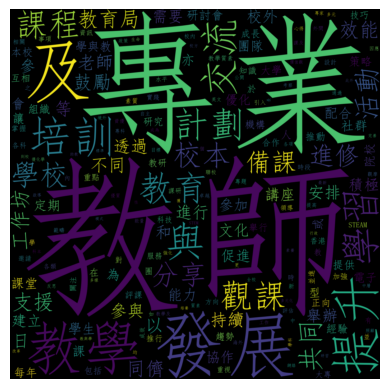

In [307]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

hscse_school_ethos_splitArr = schools_datasets['hscse_school_ethos'].apply(jieba.lcut)
hscse_hsc_splitArr = schools_datasets['hscse_hsc'].apply(jieba.lcut)

scha_curriculum_tailoring_and_adaptation_splitArr = schools_datasets['scha_curriculum_tailoring_and_adaptation'].apply(jieba.lcut)
scha_cater_for_learner_diversity_splitArr = schools_datasets['scha_cater_for_learner_diversity'].apply(jieba.lcut)
scha_cultivation_of_positive_values_and_attitudes_splitArr = schools_datasets['scha_cultivation_of_positive_values_and_attitudes'].apply(jieba.lcut)
scha_integrated_education_splitArr = schools_datasets['scha_integrated_education'].apply(jieba.lcut)
	
fdev_school_dev_plan_splitArr = schools_datasets['fdev_school_dev_plan'].apply(jieba.lcut)	
fdev_teacher_pro_training_and_dev_splitArr = schools_datasets['fdev_teacher_pro_training_and_dev'].apply(jieba.lcut)	
	
words_list = [
    hscse_school_ethos_splitArr,
    hscse_hsc_splitArr,

    scha_curriculum_tailoring_and_adaptation_splitArr,
    scha_cater_for_learner_diversity_splitArr,
    scha_cultivation_of_positive_values_and_attitudes_splitArr,
    scha_integrated_education_splitArr,
        
    fdev_school_dev_plan_splitArr,
    fdev_teacher_pro_training_and_dev_splitArr,
]

cloud_arr = []
font = r'C:\Windows\Fonts\simfang.ttf'
for (index, words_arr) in enumerate(words_list):
    words_data = [word for word_arr in words_arr for (index, word) in enumerate(word_arr) if index != 0 and word not in ['.', '，', ',', '。','br', '的'] and index != (len(word_arr)-1)]
    words = ''
    for word in words_data:
        words += word +' '
    wordcloud = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2).generate(words)
    plt.imshow(wordcloud, interpolation='bilinear')
    wordcloud.to_file(f'words{index}.png') 
    plt.axis("off")
    cloud_arr.append(wordcloud)


In [308]:
schools_datasets.head(1)

,district,school_name,school_type_1,title_supervisor,student_gender,sponsoring_body,commencement_of_operation_year,religion,school_size,medium_of_instruction,...,scha_cultivation_of_positive_values_and_attitudes,scha_cater_for_learner_diversity,scha_integrated_education,scha_support_for_non_chinese,scha_curriculum_tailoring_and_adaptation,hscse_hsc,hscse_school_ethos,fdev_school_dev_plan,fdev_teacher_pro_training_and_dev,sch_character_others
0,中西區,聖公會聖馬太小學,資助,牧師,男女,聖公宗（香港）小學監理委員會有限公司,1876,基督教,375.0,中文,...,1. 成立升旗隊、每週升國旗儀式及國旗下講話，培養學生國民身份認同。<br>2. 透過講座、...,1. 培訓不同才能的學生，安排學生參加比賽和交流活動。<br>2. P.1-6學生按中文學習...,1. 個別及小組支援訓練。<br>2. 「及早識別和輔導有學習困難的小一學生」計劃，安排小一...,本校為錄取的非華語學生提供額外支援，幫助他們學習中文：提供課後中文學習支援；增聘額外教師／教...,為有特殊學習需要的學生調適功課，並在測驗／考試時作特別安排。,家長教師會舉辦不同的活動（如親子旅行、聖誕聯歡會、家長講座、家長工作坊等），以加強家長之間及...,1. 提升學生的自信心和建立正面的價值觀。 2. 培養學生愛己愛人的態度。,1. 發展共通能力 2. 照顧學習多樣性 3. 認識自己強弱項 <br>...,1. 範疇：學與教、學生發展、學校發展、專業群體關係及服務和教師專業身份。<br>2. 發展...,1. 各學科及術科均設有獎學金。<br>2. 於校外比賽獲多個獎項，如：香港學校戲劇節、香港...


In [260]:
schools_datasets.head(1)

,district,school_name,school_type_1,title_supervisor,student_gender,sponsoring_body,commencement_of_operation_year,religion,school_size,medium_of_instruction,...,scha_cultivation_of_positive_values_and_attitudes,scha_cater_for_learner_diversity,scha_integrated_education,scha_support_for_non_chinese,scha_curriculum_tailoring_and_adaptation,hscse_hsc,hscse_school_ethos,fdev_school_dev_plan,fdev_teacher_pro_training_and_dev,sch_character_others
0,中西區,聖公會聖馬太小學,資助,牧師,男女,聖公宗（香港）小學監理委員會有限公司,1876,基督教,375.0,中文,...,1. 成立升旗隊、每週升國旗儀式及國旗下講話，培養學生國民身份認同。<br>2. 透過講座、...,1. 培訓不同才能的學生，安排學生參加比賽和交流活動。<br>2. P.1-6學生按中文學習...,1. 個別及小組支援訓練。<br>2. 「及早識別和輔導有學習困難的小一學生」計劃，安排小一...,本校為錄取的非華語學生提供額外支援，幫助他們學習中文：提供課後中文學習支援；增聘額外教師／教...,為有特殊學習需要的學生調適功課，並在測驗／考試時作特別安排。,家長教師會舉辦不同的活動（如親子旅行、聖誕聯歡會、家長講座、家長工作坊等），以加強家長之間及...,1. 提升學生的自信心和建立正面的價值觀。 2. 培養學生愛己愛人的態度。,1. 發展共通能力 2. 照顧學習多樣性 3. 認識自己強弱項 <br>...,1. 範疇：學與教、學生發展、學校發展、專業群體關係及服務和教師專業身份。<br>2. 發展...,1. 各學科及術科均設有獎學金。<br>2. 於校外比賽獲多個獎項，如：香港學校戲劇節、香港...


In [261]:
district_and_school_type_1 = schools_datasets.groupby(['district', 'school_type_1']).size().reset_index(name='school_count')
fig = px.sunburst(district_and_school_type_1, path=['district', 'school_type_1'], values='school_count',
                  color='school_count')
fig.show()

In [297]:
district_and_school_type_1.head(5)

,district,school_type_1,school_count
0,中西區,官立,2
1,中西區,私立,4
2,中西區,資助,14
3,九龍城區,官立,4
4,九龍城區,直資,2


In [262]:
district_and_title_supervisor = schools_datasets.groupby(['title_supervisor','district']).size().reset_index(name='supervisor_count')
fig = px.sunburst(district_and_title_supervisor, path=['title_supervisor','district'], values='supervisor_count',
                  color='supervisor_count')
fig.show()

In [263]:
district_and_student_gender = schools_datasets.groupby(['district','student_gender']).size().reset_index(name='gender_count')

fig = px.sunburst(district_and_student_gender, path=['student_gender','district'], values='gender_count',
                  color='gender_count')
fig.show()

In [264]:
district_and_religion = schools_datasets.groupby(['district', 'religion']).size().reset_index(name='religion_count')

fig = px.pie(district_and_religion, values='religion_count', names='religion', title='Number of school with religion')
fig.show()

In [265]:
fig = px.treemap(district_and_religion, path=[px.Constant('Hong Kong'), 'religion','district' ], values='religion_count',
                  color='religion_count')
fig.show()

In [266]:
district_and_religion = schools_datasets.groupby(['commencement_of_operation_year', 'religion']).size().reset_index(name='commencement_of_operation_year_count')
fig = px.scatter(district_and_religion, x="commencement_of_operation_year", y="commencement_of_operation_year_count", size="commencement_of_operation_year_count", color="religion",
           hover_name="religion", log_x=True, size_max=40)
fig.show()


In [284]:
primary_school_all = pd.merge(schools_datasets,primary_school_code_HKMO_Award[['school code','school_name','2024','2023','2022','2021','total']] , on='school_name')

In [295]:
primary_school_all.head(1)

,district,school_name,school_type_1,title_supervisor,student_gender,sponsoring_body,commencement_of_operation_year,religion,school_size,medium_of_instruction,...,hscse_school_ethos,fdev_school_dev_plan,fdev_teacher_pro_training_and_dev,sch_character_others,school code,2024,2023,2022,2021,total
0,香港南區,聖保羅書院小學,直資,先生,男,聖保羅書院校董會,1851,基督教,5380.0,中文（包括：普通話）及英文,...,學校重視學生的品德培養，為學生規劃完整的德育課程，強調學生自律、自省，能夠在「適當的時間，適...,1. 拓闊學生眼界（環球教室） <br>2. 加強對外的聯繫、交流 <br>3. 改...,老師參與進修課程、工作坊、簡介會及教學經驗分享會。除了個人的專業進修課程，老師亦參與學校舉辦...,獎學金：設置不同範疇的獎學金表揚學生各方面的成就及貢獻。,AP0552,12.0,4.0,2.0,6.0,24.0


In [302]:
sorted_by_school_size = primary_school_all.sort_values(by=['school_size'], ascending=[False])

district_and_school_size_30 = sorted_by_school_size.groupby(['district', 'school_size']).size().reset_index(name='school_count')[:30]
fig1 = px.pie(district_and_school_size_30, values='school_count', names='district', title='Sorted by shcool size before 30')
fig1.show()

district_and_school_size_100 = primary_school_all.groupby(['district', 'school_size']).size().reset_index(name='school_count')[:100]
fig2 = px.pie(district_and_school_size_100, values='school_count', names='district', title='Sorted by shcool size before 100')
fig2.show()

district_and_school_size_300 = sorted_by_school_size.groupby(['district', 'school_size']).size().reset_index(name='school_count')[:300]
fig3 = px.pie(district_and_school_size_300, values='school_count', names='district', title='Sorted by shcool size before 300')
fig3.show()